# R - Week 2 (exercises)

## R-code on solving equations with inverse matrix

Solve the following system of equations:

1. $2x+y+2z=3$
2. $x-3z=-5$
3. $2y+5z=4$

$$ \begin{bmatrix} 2 & 1 & 2 \\ 1 & 6 & -3 \\ 0 & 2 & 5 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 3 & -5 & 4 \end{bmatrix} $$

$ A \vec{x} = \vec{b}$

$A^{-1}\cdot A \vec{x} = A^{-1} \vec{b}$

$I \vec{x} = A^{-1} \vec{b}$

Define matrix $A$:

In [2]:
A = matrix(c(2,1,2,1,6,-3,0,2,5), nrow=3)
A

2,1,0
1,6,2
2,-3,5


The inverse $A^{-1}$ is:

In [3]:
solve(A)

0.50704225,-0.07042254,0.02816901
-0.01408451,0.14084507,-0.05633803
-0.21126761,0.11267606,0.15492958


Define vector $\vec{b}$:

In [4]:
b = c(3, -5, 4)

Solve the system with R functions `solve(A,b)`:

In [5]:
solve(A,b)

[1]  1.9859155 -0.9718310 -0.5774648

Solve the system with $\vec{x}=A^{-1}\vec{b}$:

In [6]:
solve(A) %*% b

1.9859155
-0.9718310
-0.5774648


## R-code on least square method

$y=ax+b$

$A\cdot \vec{x} = \vec{b}$

$A^T\cdot A \vec{x} = A^T \vec{b}$

$(A^T A)^{-1}A^T A \vec{x} = A^T \vec{b}$

$(A^T A)^{-1} ...$

Define $\vec{x}=\begin{bmatrix}12 & 2 & 3 & 5 & 10 & 9 & 8 \end{bmatrix}$:

In [7]:
x = c(12, 2, 3, 5, 10, 9, 8)

In [8]:
x

[1] 12  2  3  5 10  9  8

Define $\vec{y} = \begin{bmatrix}125 & 30 & 43 & 62 & 108 & 102 & 90 \end{bmatrix}$:

In [29]:
y = c(125, 30, 43, 62, 108, 102, 90)

In [10]:
y

[1] 125  30  43  62 108 102  90

In [11]:
length(x)==length(y)

[1] TRUE

In [12]:
A = matrix(union(x,y), nrow=length(x))

In [13]:
A

12,125
2,30
3,43
5,62
10,108
9,102
8,90


In [14]:
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     13.583        9.488  


In [15]:
fit <- function(x) 9.488*x+13.583

In [16]:
fit(5)

[1] 61.023

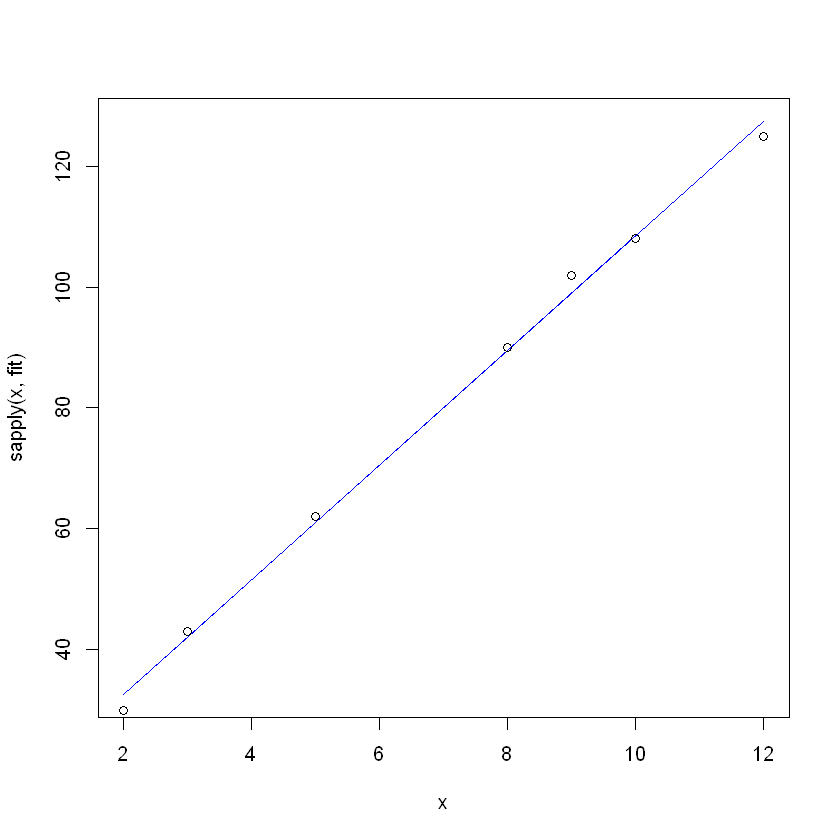

In [17]:
plot(x,sapply(x, fit), 'l', col='blue')
points(x,y)

In [60]:
x

[1] 12  2  3  5 10  9  8

In [61]:
y

[1] 125  30  43  62 108 102  90

$y=ax+b$

In [62]:
X = matrix(c(y, rep(1, length(y))), ncol=2)

In [63]:
X

125,1
30,1
43,1
62,1
108,1
102,1
90,1


In [64]:
b = matrix(y)

In [65]:
b

125
30
43
62
108
102
90


Dit is de vorm $A\cdot\vec{x} = \vec{b}$. Wat we op willen lossen met $A^{-1}A\vec{x}=A^{-1}\vec{b}$, maar dit werkt niet omdat $A$ geen vierkante matrix is en daardoor geen inverse kan bepalen voor $A$.

Door gebruik te maken van de getransponeerde $A^T$ kunnen we een vierkante matrix krijgen. Dus matrix-vermenigvuldigen van $A\vec{x}=\vec{b}$ met $A^T$ geeft $A^T\cdot A\vec{x} = A^T\cdot\vec{b}$.

In [66]:
t(A) %*% A

427,4717
4717,52386


Wat inderdaad een vierkant matrix geeft. Vervolgens is deze op te lossen door de inverse te bepalen. De hele formule wordt dan:

$$ (A^T \cdot A)^{-1}\cdot(A^T \cdot A)\cdot\vec{x} = (A^T \cdot A)^{-1} \cdot A^T \cdot \vec{b} $$

Laat $B = (A^T \cdot A)^{-1}$ zijn. Substitueren en vereenvoudigen geeft: 

$$ I\cdot\vec{x} = B \cdot A^T \cdot \vec{b} $$

In [67]:
B = solve(t(A) %*% A)
B

0.44120843,-0.039727793
-0.03972779,0.003596304


In [74]:
B %*% t(A) %*% b

-4.13003e-13
1.00000e+00


In [69]:
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     13.583        9.488  


**Versimpeld voorbeeld lreg**

In [118]:
A = matrix(c(-1,0,2,3,1,1,1,1),ncol=2)

In [119]:
A

-1,1
0,1
2,1
3,1


In [120]:
b = c(-1,2,1,2)

In [121]:
b

[1] -1  2  1  2

In [127]:
x = A[0:4]

In [128]:
solve(t(A) %*% A) %*% t(A) %*% b

0.5
0.5


In [129]:
lm(b~x)


Call:
lm(formula = b ~ x)

Coefficients:
(Intercept)            x  
        0.5          0.5  


In [130]:
fit <- function(x) 0.5*x+0.5

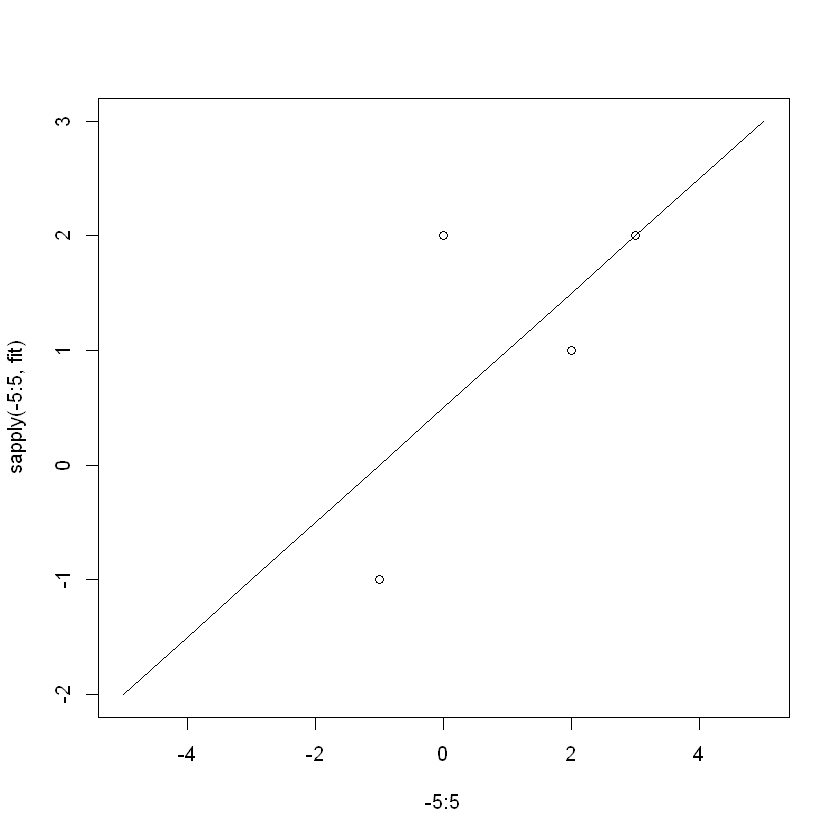

In [131]:
plot(-5:5, sapply(-5:5, fit), 'l')
points(x,b)

In [267]:
lreg <- function(x, y) {
    A = cbind(x, rep(1, length(x)))
    s = solve(t(A) %*% A) %*% t(A) %*% y
    function(x) s[1] * x + s[2] # Return f(x)=ax+b
}

In [268]:
x = c(12,2,3,5,10,9,8)
y = c(125,30,43,62,108,102,90)

In [269]:
fit <- lreg(x, y)

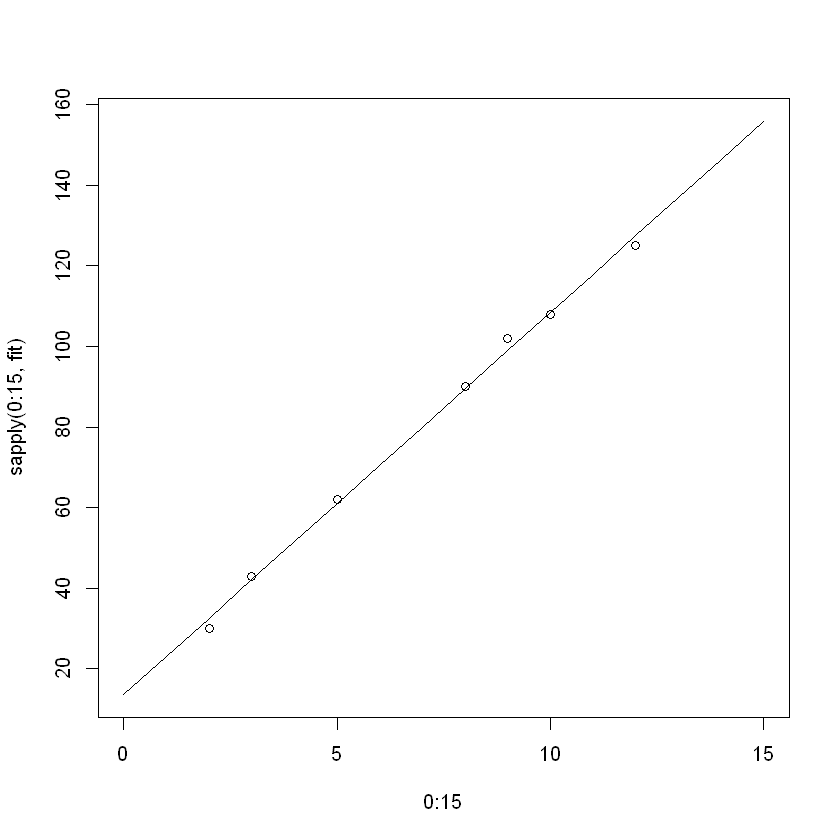

In [270]:
plot(0:15, sapply(0:15, fit), 'l')
points(x,y)

With other functionality:

### Least squares regression model

Find the best fitting line $y=ax+b$ for the following data points:

In [311]:
x <- c(12,2,3,5,10,9,8)
b <- c(125,30,43,62,108,102,90)

We can do this by solving the equation $A\vec{x}=\vec{b}$. Constructing the equation with the matrices for our data points yields:

$$ \begin{bmatrix} 12 & 1 \\ 2 & 1 \\ 3 & 1 \\ 5 & 1 \\ 10 & 1 \\ 9 & 1 \\ 8 & 1 \end{bmatrix} \cdot \begin{bmatrix}a \\ b \end{bmatrix} = \begin{bmatrix} 125 \\ 30 \\ 43 \\ 62 \\ 108 \\ 102 \\ 90 \end{bmatrix} $$

First we will construct our matrix $A$:

In [312]:
ones <- rep(1, length(x))

In [297]:
A <- cbind(x, ones)

In [313]:
A

x,ones
12,1
2,1
3,1
5,1
10,1
9,1
8,1


If we want to solve the equation $A\vec{x}=\vec{b}$ we can multiply both sides $A^{-1}$ to get:

$$ \begin{align} A\vec{x}&=\vec{b} \\ (A^{-1}\cdot A)\vec{x}&=A^{-1}\vec{b} \\ I\vec{x}&=A^{-1}\vec{b} \end{align} $$

However, we need to calculate the inverse of $A$, but $A$ is not a square matrix. To solve this problem we multiply $A$ with $A^T$ to get a square matrix.

$$ \begin{align} A\vec{x}&=\vec{b} \\ (A^T \cdot A) \cdot \vec{x} &= A^T \cdot \vec{b} \\ (A^T \cdot A)^{-1} \cdot (A^T \cdot A) \cdot \vec{x} &= (A^T \cdot A)^{-1} \cdot A^T \cdot \vec{b} \\ I \cdot \vec{x} &= (A^T \cdot A)^{-1} \cdot A^T \cdot \vec{b} \end{align} $$

In [298]:
S = solve(t(A) %*% A) %*% t(A) %*% b

The resulting matrix $S$ will have our coefficients $a$ and $b$ to construct the line:

In [308]:
lsm = c(S[2], S[1])

In [310]:
lsm

[1] 13.583333  9.488095

If we verify the coefficients with built-in R functionality for least-squares regression, we can see that our solution is correct.

In [301]:
lm(b~x)


Call:
lm(formula = b ~ x)

Coefficients:
(Intercept)            x  
     13.583        9.488  


Plotting our values yields:

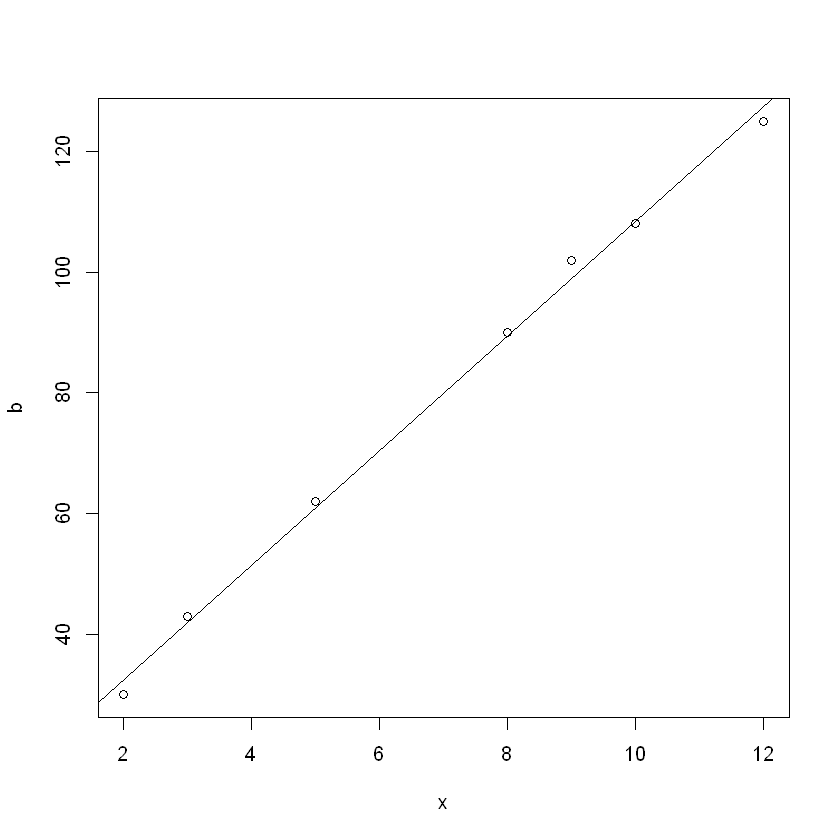

In [309]:
plot(x, b)
abline(lsm)

In [2]:
sigmoid <- function(z) 1 / (1 + exp(-z))

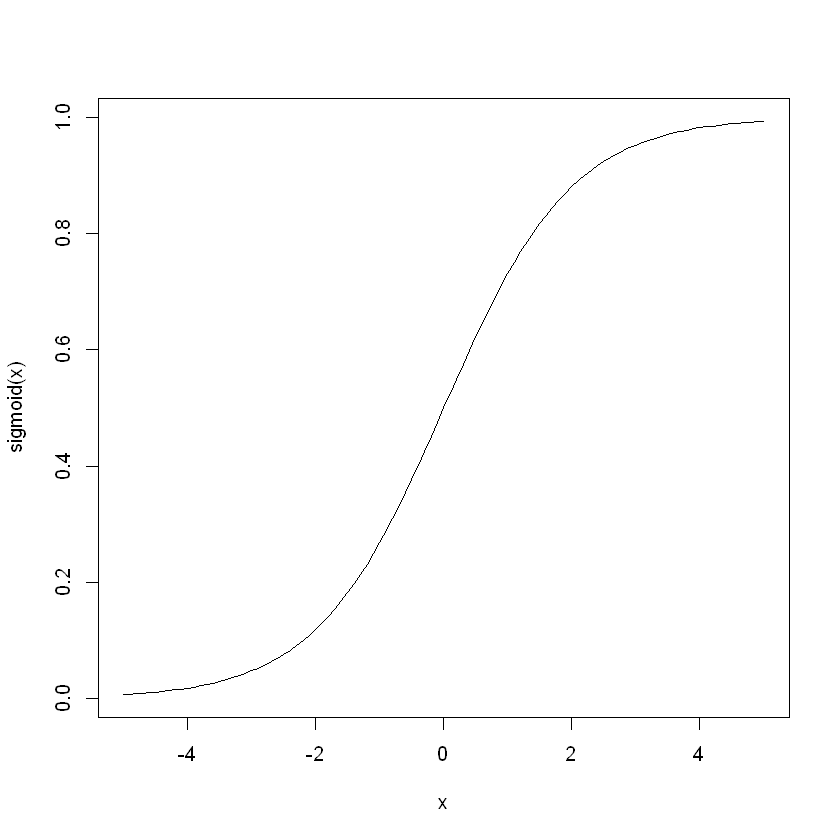

In [5]:
curve(sigmoid, from=-5, to=5)

Tada.

In [1]:
e

ERROR: Error in eval(expr, envir, enclos): object 'e' not found
